# Pandas tutorial
This notebook is aimed to show the many capabilities of pandas in short. Everything is explained through example code.

## Subjects overview:
- Create
- Explore
- Merge
- Select
- Update
- Sort
- Input
- Output

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Create

In [2]:
# Creating a dataframe from a dictionary. 
# A dataFrame is a 2-dimensional labeled data structure with columns.

my_dict = {
	'col0' : [1.0, 2.0, 3.0, 4.0],
	'col1' : [100, 200, 300, 400],
	'col2' : ['a', 'b', 'c', 'd'],
	'col3' : range(4)
}

df = pd.DataFrame(my_dict)
df

,col0,col1,col2,col3
0,1.0,100,a,0
1,2.0,200,b,1
2,3.0,300,c,2
3,4.0,400,d,3


In [3]:
# A dataframe column could have any type:
df.dtypes

col0    float64
col1      int64
col2     object
col3      int64
dtype: object

In [4]:
# Series: one-dimensional labeled array. Could be a column.

s1 = pd.Series({'row1':1, 'row2':4, 'row3':9})
s2 = pd.Series({'row1':3, 'row2':2, 'row4':5})

print(s1)
print()
print(s2)

row1    1
row2    4
row3    9
dtype: int64

row1    3
row2    2
row4    5
dtype: int64


In [5]:
# Series can be merged together and from a dataframe:
# df = pd.concat([s1, s2], axis=1)

# Merge with specifying the column name:
df = pd.concat({'A':s1, 'B':s2}, axis=1)
df

,A,B
row1,1.0,3.0
row2,4.0,2.0
row3,9.0,NaN
row4,NaN,5.0


In [6]:
# Creating a dataframe with a time-stamp row index:
df_dates = pd.DataFrame(np.random.rand(200,3))
df_dates.index = pd.date_range('1/1/2021', periods=len(df_dates), freq='d')
df_dates.columns= ['col1', 'col2', 'col3']
df_dates

,col1,col2,col3
2021-01-01,0.622837,0.748986,0.515589
2021-01-02,0.029535,0.890754,0.165280
2021-01-03,0.339801,0.366470,0.661339
2021-01-04,0.127715,0.468691,0.085320
2021-01-05,0.842296,0.803745,0.095163
...,...,...,...
2021-07-15,0.819797,0.081282,0.376209
2021-07-16,0.583304,0.855505,0.687654
2021-07-17,0.014402,0.364109,0.262901
2021-07-18,0.666301,0.330034,0.467646


## Explore

In [7]:
# Modify dataframe columns (to make the data more interesting for next exmple)
df_dates['col2'] = df_dates['col2'] / 2
df_dates['col3'] = df_dates['col3'] + 2

# df_dates.head(3)
df_dates.tail(3)

,col1,col2,col3
2021-07-17,0.014402,0.182054,2.262901
2021-07-18,0.666301,0.165017,2.467646
2021-07-19,0.398655,0.365987,2.745397


Text(0.5, 1.0, 'Boxplot')

<Figure size 432x288 with 0 Axes>

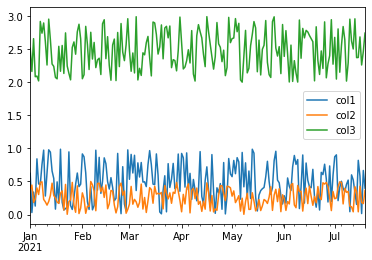

<Figure size 432x288 with 0 Axes>

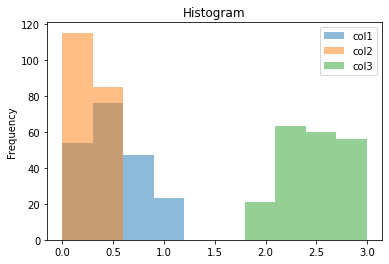

<Figure size 432x288 with 0 Axes>

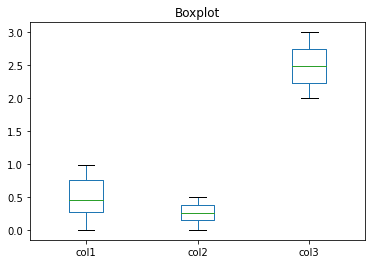

In [8]:
# Plot dataframe
plt.figure()
df_dates.plot()

plt.figure()
df_dates.plot.hist(alpha=0.5)
plt.title('Histogram')

plt.figure()
df_dates.plot.box()
plt.title('Boxplot')


In [9]:
data_dict = {
	'col1' : range(15),
	'col2': random.choices(['A','B', 'C'], k=15)
}
df = pd.DataFrame(data_dict)
df

,col1,col2
0,0,A
1,1,C
2,2,B
3,3,C
4,4,C
5,5,A
6,6,B
7,7,B
8,8,B
9,9,C


In [10]:
# Column statistics:
print('col1:')
print('size:', df['col1'].size)
print('count:', df['col1'].count()) # non-NA count (None, NaN, NaT)
print('sum:', df['col1'].sum())
print('min:', df['col1'].min())
print('max:', df['col1'].max())
print('mean:', df['col1'].mean())
print('median:', df['col1'].median())
print('sorted values:', df['col1'].sort_values(ascending=False).to_list())
print()

print('col2:')
print('unique values:', df['col2'].unique()) 
print('value_counts:\n', df['col2'].value_counts())


col1:
size: 15
count: 15
sum: 105
min: 0
max: 14
mean: 7.0
median: 7.0
sorted values: [14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

col2:
unique values: ['A' 'C' 'B']
value_counts:
 B    6
C    5
A    4
Name: col2, dtype: int64


## Merge

In [11]:
data1 = {
	'col1' : range(-2, 8),
	'col2': ["lorem", "ipsum", "dolor", "sit", "amet", "consectetur", "adipiscing", "elit", "integer", "at"]
}
data2 = {
	'col1' : range(12),
	'col3': random.choices(['A','B', 'C'], k=12)
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

print('df1 len:', len(df1))
print('df2 len:', len(df2))

# merge parameter how can be: 'left', 'right', 'inner', 'outer'
df = pd.merge(df1, df2, how='outer', on='col1')
df

df1 len: 10
df2 len: 12


,col1,col2,col3
0,-2,lorem,NaN
1,-1,ipsum,NaN
2,0,dolor,C
3,1,sit,A
4,2,amet,B
5,3,consectetur,A
6,4,adipiscing,B
7,5,elit,B
8,6,integer,A
9,7,at,C


## Select

In [12]:
# Grab the index values
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [13]:
# Select columns
df_selection = df[['col2', 'col3']] 

# Remove NA values
df_selection = df_selection.dropna()

df_selection

,col2,col3
2,dolor,C
3,sit,A
4,amet,B
5,consectetur,A
6,adipiscing,B
7,elit,B
8,integer,A
9,at,C


In [14]:
# Select rows from dataframe based on a condition, returns a boolean series
print(df["col3"]=='A')

# Apply selection on dataframe
df[df["col3"]=='A']
df

0     False
1     False
2     False
3      True
4     False
5      True
6     False
7     False
8      True
9     False
10    False
11    False
12     True
13    False
Name: col3, dtype: bool


,col1,col2,col3
0,-2,lorem,NaN
1,-1,ipsum,NaN
2,0,dolor,C
3,1,sit,A
4,2,amet,B
5,3,consectetur,A
6,4,adipiscing,B
7,5,elit,B
8,6,integer,A
9,7,at,C


In [15]:
# Keep rows based on multiple conditions
df[(df['col1'] >= 5) & (df['col2'].notna())]

,col1,col2,col3
7,5,elit,B
8,6,integer,A
9,7,at,C


In [16]:
# Keep rows where col2 contains an 'e'
df = df.dropna()
df[df['col2'].str.contains('e')]

,col1,col2,col3
4,2,amet,B
5,3,consectetur,A
7,5,elit,B
8,6,integer,A


## Update

In [17]:
data1 = [1,2,3,4,5,np.nan,6,7,np.nan,np.nan,8,9,10,np.nan]
data2 = [4,5,np.nan,6,7,np.nan,np.nan,8,9,10,np.nan,1,2,3]

df = pd.DataFrame({'col1': data1, 'col2': data2})
df

,col1,col2
0,1.0,4.0
1,2.0,5.0
2,3.0,NaN
3,4.0,6.0
4,5.0,7.0
5,NaN,NaN
6,6.0,NaN
7,7.0,8.0
8,NaN,9.0
9,NaN,10.0


In [18]:
df = df.fillna(777) # replace NA values with custom value
df

,col1,col2
0,1.0,4.0
1,2.0,5.0
2,3.0,777.0
3,4.0,6.0
4,5.0,7.0
5,777.0,777.0
6,6.0,777.0
7,7.0,8.0
8,777.0,9.0
9,777.0,10.0


In [19]:
df['count'] = range(len(df))
df['percent'] = df['count'] / len(df) * 100.0
df

,col1,col2,count,percent
0,1.0,4.0,0,0.000000
1,2.0,5.0,1,7.142857
2,3.0,777.0,2,14.285714
3,4.0,6.0,3,21.428571
4,5.0,7.0,4,28.571429
5,777.0,777.0,5,35.714286
6,6.0,777.0,6,42.857143
7,7.0,8.0,7,50.000000
8,777.0,9.0,8,57.142857
9,777.0,10.0,9,64.285714


In [20]:
# Drop column 'count'
df = df.drop(['count'], axis=1)
df

,col1,col2,percent
0,1.0,4.0,0.000000
1,2.0,5.0,7.142857
2,3.0,777.0,14.285714
3,4.0,6.0,21.428571
4,5.0,7.0,28.571429
5,777.0,777.0,35.714286
6,6.0,777.0,42.857143
7,7.0,8.0,50.000000
8,777.0,9.0,57.142857
9,777.0,10.0,64.285714


In [21]:
# Set column values based on a criteria
# df.col1 does the same as df["col1"]
df.col1 = df.col1.replace(777, 999)
df['col3'] = df.col1.where(df.col1 < 8, other=0)
df['col4'] = df.col1.where(df.col3 != 0, other=df.percent)
df

,col1,col2,percent,col3,col4
0,1.0,4.0,0.000000,1.0,1.000000
1,2.0,5.0,7.142857,2.0,2.000000
2,3.0,777.0,14.285714,3.0,3.000000
3,4.0,6.0,21.428571,4.0,4.000000
4,5.0,7.0,28.571429,5.0,5.000000
5,999.0,777.0,35.714286,0.0,35.714286
6,6.0,777.0,42.857143,6.0,6.000000
7,7.0,8.0,50.000000,7.0,7.000000
8,999.0,9.0,57.142857,0.0,57.142857
9,999.0,10.0,64.285714,0.0,64.285714


## Reorder

In [22]:
# Rename column labels
df.rename(columns={'col1':'A','col2':'B'})

,A,B,percent,col3,col4
0,1.0,4.0,0.000000,1.0,1.000000
1,2.0,5.0,7.142857,2.0,2.000000
2,3.0,777.0,14.285714,3.0,3.000000
3,4.0,6.0,21.428571,4.0,4.000000
4,5.0,7.0,28.571429,5.0,5.000000
5,999.0,777.0,35.714286,0.0,35.714286
6,6.0,777.0,42.857143,6.0,6.000000
7,7.0,8.0,50.000000,7.0,7.000000
8,999.0,9.0,57.142857,0.0,57.142857
9,999.0,10.0,64.285714,0.0,64.285714


In [23]:
# Sort dataframe
df = df.sort_values(by=['col1', 'col2'], ascending=[1, 0])
df

,col1,col2,percent,col3,col4
0,1.0,4.0,0.000000,1.0,1.000000
1,2.0,5.0,7.142857,2.0,2.000000
2,3.0,777.0,14.285714,3.0,3.000000
3,4.0,6.0,21.428571,4.0,4.000000
4,5.0,7.0,28.571429,5.0,5.000000
6,6.0,777.0,42.857143,6.0,6.000000
7,7.0,8.0,50.000000,7.0,7.000000
10,8.0,777.0,71.428571,0.0,71.428571
11,9.0,1.0,78.571429,0.0,78.571429
12,10.0,2.0,85.714286,0.0,85.714286


## Output

In [24]:
# Dataframe to other object
list_out = df['col1'].tolist() 
print(list_out)
print()

dict_out = df['col1'].to_dict()
print(dict_out)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 999.0, 999.0, 999.0, 999.0]

{0: 1.0, 1: 2.0, 2: 3.0, 3: 4.0, 4: 5.0, 6: 6.0, 7: 7.0, 10: 8.0, 11: 9.0, 12: 10.0, 5: 999.0, 9: 999.0, 8: 999.0, 13: 999.0}


In [25]:
# Dataframe to CSV file
df.to_csv('tutorial_data.csv', encoding='utf-8')

## Input

In [26]:
# File to dataframe
# df_read = pd.read_csv('tutorial_data.csv')
df_read = pd.read_csv('tutorial_data.csv', index_col=0, na_values = [777, 999])
df_read

,col1,col2,percent,col3,col4
0,1.0,4.0,0.000000,1.0,1.000000
1,2.0,5.0,7.142857,2.0,2.000000
2,3.0,NaN,14.285714,3.0,3.000000
3,4.0,6.0,21.428571,4.0,4.000000
4,5.0,7.0,28.571429,5.0,5.000000
6,6.0,NaN,42.857143,6.0,6.000000
7,7.0,8.0,50.000000,7.0,7.000000
10,8.0,NaN,71.428571,0.0,71.428571
11,9.0,1.0,78.571429,0.0,78.571429
12,10.0,2.0,85.714286,0.0,85.714286
